In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("Jan_to_June.csv",parse_dates=["date"],dayfirst=True)
df.info
df.shape

(17386, 3)

In [6]:
from datetime import datetime,date,time

In [7]:
df.dropna()

,date,time,mcp
0,2021-01-01,00:00,2301.03
1,2021-01-01,00:15,2300.12
2,2021-01-01,00:30,2298.10
3,2021-01-01,00:45,2243.24
4,2021-01-01,01:00,2131.71
...,...,...,...
17381,2021-06-30,23:00,8500.98
17382,2021-06-30,23:15,8500.91
17383,2021-06-30,23:30,8500.84
17384,2021-06-30,23:45,8500.72


In [8]:
for i in range(0,df['time'].size):
    df.loc[i,'time']=datetime.strptime(df.loc[i,'time'], '%H:%M').time()

In [9]:
for i in range (0,df['time'].size) :
    df.loc[i,'days']=pd.Timestamp.combine((df.loc[i,'date']),(df.loc[i,'time']))

In [10]:
df

,date,time,mcp,days
0,2021-01-01,00:00:00,2301.03,2021-01-01 00:00:00
1,2021-01-01,00:15:00,2300.12,2021-01-01 00:15:00
2,2021-01-01,00:30:00,2298.10,2021-01-01 00:30:00
3,2021-01-01,00:45:00,2243.24,2021-01-01 00:45:00
4,2021-01-01,01:00:00,2131.71,2021-01-01 01:00:00
...,...,...,...,...
17381,2021-06-30,23:00:00,8500.98,2021-06-30 23:00:00
17382,2021-06-30,23:15:00,8500.91,2021-06-30 23:15:00
17383,2021-06-30,23:30:00,8500.84,2021-06-30 23:30:00
17384,2021-06-30,23:45:00,8500.72,2021-06-30 23:45:00


In [11]:
df=df.set_index('days')

In [12]:
df

,date,time,mcp
days,,,
2021-01-01 00:00:00,2021-01-01,00:00:00,2301.03
2021-01-01 00:15:00,2021-01-01,00:15:00,2300.12
2021-01-01 00:30:00,2021-01-01,00:30:00,2298.10
2021-01-01 00:45:00,2021-01-01,00:45:00,2243.24
2021-01-01 01:00:00,2021-01-01,01:00:00,2131.71
...,...,...,...
2021-06-30 23:00:00,2021-06-30,23:00:00,8500.98
2021-06-30 23:15:00,2021-06-30,23:15:00,8500.91
2021-06-30 23:30:00,2021-06-30,23:30:00,8500.84


In [13]:
df=df.drop(['time'],axis=1)

In [14]:
df

,date,mcp
days,,
2021-01-01 00:00:00,2021-01-01,2301.03
2021-01-01 00:15:00,2021-01-01,2300.12
2021-01-01 00:30:00,2021-01-01,2298.10
2021-01-01 00:45:00,2021-01-01,2243.24
2021-01-01 01:00:00,2021-01-01,2131.71
...,...,...
2021-06-30 23:00:00,2021-06-30,8500.98
2021-06-30 23:15:00,2021-06-30,8500.91
2021-06-30 23:30:00,2021-06-30,8500.84


In [15]:
df=df.resample('1H').mean()

C:\Temp\ipykernel_2356\3977504172.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.resample('1H').mean()


In [16]:
df

,mcp
days,
2021-01-01 00:00:00,2285.6225
2021-01-01 01:00:00,2097.2125
2021-01-01 02:00:00,2008.1925
2021-01-01 03:00:00,2008.3225
2021-01-01 04:00:00,2038.7250
...,...
2021-06-30 19:00:00,5835.3550
2021-06-30 20:00:00,6685.8250
2021-06-30 21:00:00,8928.0950


<AxesSubplot:xlabel='days'>

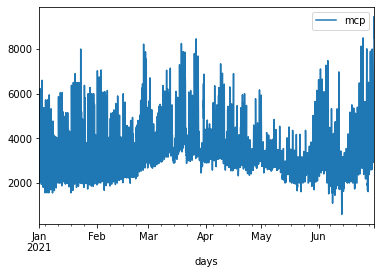

In [17]:
df.plot()

In [18]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(df['mcp'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(mcp):
    result=adfuller(mcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [21]:
adfuller_test(df['mcp'])

ADF Test Statistic : -4.980502397608371
p-value : 2.4251886358749047e-05
#Lags Used : 31
Number of Observations Used : 4312
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [187]:
# df['Seasonal First Difference']=df['mcp']-df['mcp'].shift(50)

In [220]:
## Again test dickey fuller test
# adfuller_test(df['Seasonal First Difference'].dropna())

In [221]:
# df['Seasonal First Difference'].plot()

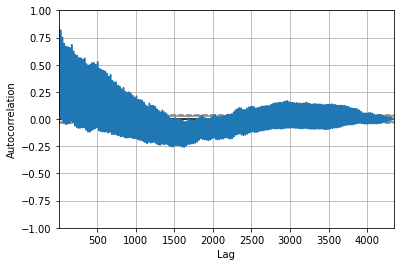

In [30]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['mcp'])
plt.show()

In [31]:
import statsmodels.api as sm

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\arpan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


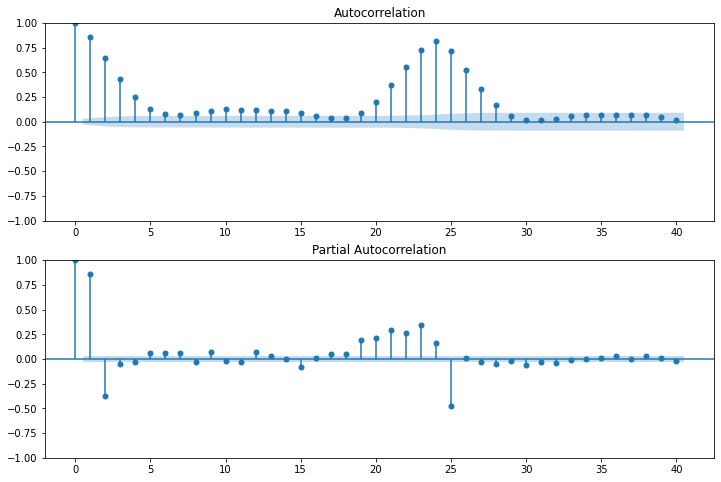

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['mcp'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['mcp'].dropna(),lags=40,ax=ax2)

In [34]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(df['mcp'], trace=True,
# suppress_warnings=True)

In [143]:
model=sm.tsa.statespace.SARIMAX(df['mcp'],order=(20, 1, 3))
results=model.fit()

C:\Users\arpan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [144]:
# from statsmodels.tsa.arima.model import ARIMA
# model=ARIMA(df['mcp'],order=(24,0,1))
# result=model.fit()
# result.summary()

In [145]:
print(df.shape)
train=df.iloc[:-24]
test=df.iloc[-24:]
print(train.shape,test.shape)

(4344, 1)
(4320, 1) (24, 1)


In [146]:
start=len(train)
end=len(train)+len(test)-1


# df['forecast']=results.predict(start,end,dynamic=True)
# df[['mcp','forecast']].plot(figsize=(12,8))

pred=results.predict(start,end,dynamic=True)
test_vs_pred=pd.concat([test['mcp'],pred],axis=1)

<AxesSubplot:xlabel='days'>

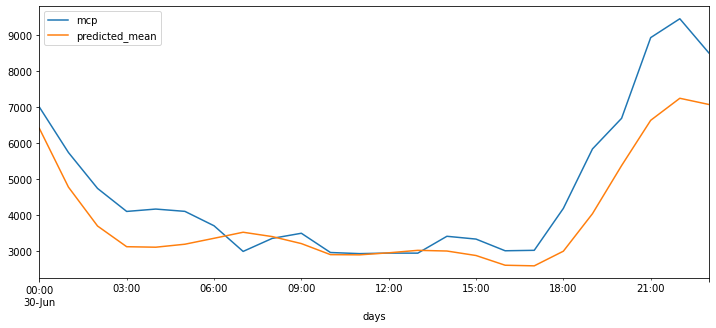

In [147]:
test_vs_pred.plot(figsize=(12,5))

In [148]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['mcp'],pred))
print(rmse)

1022.2732273554687


In [149]:
from sklearn.metrics import mean_absolute_percentage_error
error=mean_absolute_percentage_error(test['mcp'],pred)

In [150]:
print(error)

0.14999551358593566


In [116]:
# df['forecast']=results.predict(start=90,end=200,dynamic=True)
# df[['mcp','forecast']].plot(figsize=(12,8))

In [117]:
df

,mcp
days,
2021-01-01 00:00:00,2285.6225
2021-01-01 01:00:00,2097.2125
2021-01-01 02:00:00,2008.1925
2021-01-01 03:00:00,2008.3225
2021-01-01 04:00:00,2038.7250
...,...
2021-06-30 19:00:00,5835.3550
2021-06-30 20:00:00,6685.8250
2021-06-30 21:00:00,8928.0950


In [118]:
df.head()

,mcp
days,
2021-01-01 00:00:00,2285.6225
2021-01-01 01:00:00,2097.2125
2021-01-01 02:00:00,2008.1925
2021-01-01 03:00:00,2008.3225
2021-01-01 04:00:00,2038.7250


In [119]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(hours=x)for x in range(0,30)]

In [120]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [121]:
future_datest_df.head()

,mcp
2021-07-01 00:00:00,NaN
2021-07-01 01:00:00,NaN
2021-07-01 02:00:00,NaN
2021-07-01 03:00:00,NaN
2021-07-01 04:00:00,NaN


In [122]:
future_datest_df['forecast'] = results.predict(start = len(train)+len(test)-1, end = 8807, dynamic= True)  
# future_df[['forecast']].plot(figsize=(12, 8)) 

In [123]:
future_datest_df

,mcp,forecast
2021-07-01 00:00:00,NaN,7850.909970
2021-07-01 01:00:00,NaN,6571.625400
2021-07-01 02:00:00,NaN,5449.903893
2021-07-01 03:00:00,NaN,4731.591736
2021-07-01 04:00:00,NaN,4540.298824
2021-07-01 05:00:00,NaN,4219.938248
2021-07-01 06:00:00,NaN,3927.353391
2021-07-01 07:00:00,NaN,3803.350035
2021-07-01 08:00:00,NaN,3592.260172
2021-07-01 09:00:00,NaN,3376.854071


<AxesSubplot:>

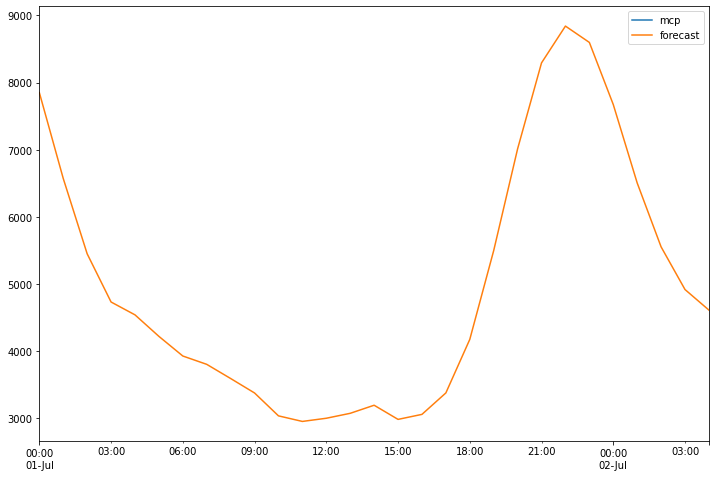

In [124]:
future_datest_df.plot(figsize=(12, 8)) 

In [125]:
future_df=pd.concat([test,future_datest_df])

<AxesSubplot:>

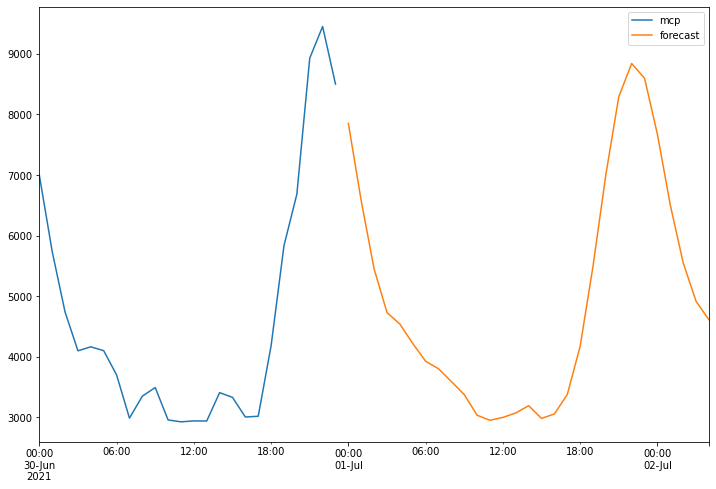

In [126]:
future_df.plot(figsize=(12, 8))

In [384]:
test.tail()

,mcp
days,
2021-12-31 19:00:00,4325.2825
2021-12-31 20:00:00,3707.3575
2021-12-31 21:00:00,3012.5650
2021-12-31 22:00:00,2531.9625
2021-12-31 23:00:00,2016.4550


In [385]:
future_df.head()

,mcp,forecast
2021-12-31 00:00:00,1924.7300,NaN
2021-12-31 01:00:00,1899.7175,NaN
2021-12-31 02:00:00,1849.8375,NaN
2021-12-31 03:00:00,1899.4025,NaN
2021-12-31 04:00:00,1869.3150,NaN


True